In [12]:
from dotenv import load_dotenv

In [13]:
load_dotenv()

True

### Adding OpenAI Model and EMbedding

In [14]:
import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [15]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [16]:
llm.invoke("hello how are you my firend?")

AIMessage(content="Hello! I am an AI assistant, so I don't have feelings, but I am here to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 15, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BwIQbUslLdVvYtVblRliC5AEwb2o0', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--52510c05-3672-4ca1-abd6-c8ff506d179c-0', usage_metadata={'input_tokens': 15, 'output_tokens': 30, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [17]:
from langchain_openai import OpenAIEmbeddings

In [18]:
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large"
)


In [19]:
len(embeddings.embed_query("hello how are you my firend?"))

3072

## Data Ingestion

In [20]:
url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [21]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [22]:
web_loader=WebBaseLoader(url)

In [23]:
data=web_loader.load()

In [24]:
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [25]:
len(data[0].metadata["description"])

1639

In [26]:
data[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [27]:
data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [28]:
urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [29]:
docs=[WebBaseLoader(url).load() for url in urls]

In [30]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [31]:
docs_list=[item for sublist in docs for item in sublist]

### Chunking

In [32]:
from langchain_text_splitters import RecursiveCharacterTextSplitter 

In [33]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=25)

In [34]:
doc_splits=text_splitter.split_documents(docs_list)

In [35]:
texts = [doc.page_content for doc in doc_splits]
metadatas = [doc.metadata for doc in doc_splits]

### Embedding: FAISS

In [36]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [37]:
index=faiss.IndexFlatIP(3072)

vectorstore=FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

vectorstore.add_texts(texts, metadatas=metadatas)

['8e1e3a15-fed5-4f9f-8b97-34b6b404f400',
 'e795195d-acf6-4fe0-af3a-381e7b9afd8f',
 '5944bf8e-20cb-4a2f-828f-f32cc85f2dbc',
 '822b7325-d61c-4612-bfde-8f465addb15f',
 'e6d77cbe-bb7a-4874-ad8c-97b84ac89317',
 '3037615e-0a34-46ac-bd22-b844b70c8bda',
 '13d5dcdb-feeb-4dd3-a82d-d39c8ec73897',
 '7036c3e4-efa1-43e0-ae2c-b0f704239855',
 '7ccd9702-a8e5-43c2-9905-68546fb0ad07',
 'bb18c81e-2096-4c6e-b40d-3e48524e85ca',
 '0fcd2ee0-0f00-4c80-898d-acd8219f9212',
 'b05a8ec9-6421-4c87-b584-e6d7895e9029',
 '58e6afaa-d904-496c-8d63-81ba6ad31e69',
 '2257a571-f306-43ef-8589-98b52443a8d4',
 '4481f767-e9cf-4996-b6f3-45a06588b505',
 'af9a1c58-239f-435d-bf05-e055ceb89856',
 '833e04bd-72a3-4001-9c00-2cd9b34a64ad',
 '0eb9bd02-40e8-40d1-bca4-5c49fb5120a0',
 '818a030f-69a7-46b4-893f-4788d05f4ee0',
 'a1c34875-d415-4e3c-a208-6f03b1a771de',
 'a0b76191-e069-4ef3-9e69-4b7bf2c4d798',
 'd8251dcb-0de9-4309-bc3a-c7c5ad312dcc',
 'ae810715-91ff-4316-af7e-c53cb88554bc',
 '179c6e04-b584-4886-b737-15defbcbebdd',
 '663f7e62-f3d8-

## Data Retrieval with Agentic Flow

In [40]:
retriever=vectorstore.as_retriever()

In [41]:
retriever.invoke("what is agent and prompt?")

[Document(id='59c47951-80ff-4925-8242-06cbd696159c', metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for

### Agentic Workflow

In [42]:
from langchain.tools.retriever import create_retriever_tool

In [43]:
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )
    
    


In [44]:
tools=[retriever_tool]

In [45]:
from langgraph.prebuilt import ToolNode

In [46]:
retriever_node=ToolNode(tools)

In [47]:
retriever_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'retriever_blog_post': Tool(name='retriever_blog_post', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001AEC84FBC40>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001AEDD6A4440>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content']

In [48]:
from typing import Annotated,Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [49]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [50]:
from langchain_core.prompts import PromptTemplate

In [51]:
llm_with_tool=llm.bind_tools(tools)

In [52]:
response=llm_with_tool.invoke("what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?")

In [53]:
response.content

''

In [54]:
response.tool_calls

[{'name': 'retriever_blog_post',
  'args': {'query': 'LLM Powered Autonomous Agents'},
  'id': 'call_R25oL6QH3vMZeh7YIC7uHyLO',
  'type': 'tool_call'},
 {'name': 'retriever_blog_post',
  'args': {'query': 'Planning and Reflection in LLMs'},
  'id': 'call_49dBGUcsCManiAOOts4wBL61',
  'type': 'tool_call'}]

In [55]:
def LLM_Decision_Maker(state:AgentState):
    print("----CALL LLM_DECISION_MAKE----")
    message=state["messages"]
    last_message=message[-1]
    question=last_message.content
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [56]:
from langchain_core.pydantic_v1 import BaseModel, Field

g:\AgenticAI\venv\Lib\site-packages\IPython\core\interactiveshell.py:3699: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
class grade(BaseModel):
    binary_score:str=Field(description="Relvance score 'yes' or 'no'")

In [58]:
from typing import Literal
#we use it for type of hinting

In [59]:
def grade_documents(state:AgentState)->Literal["Output Generator", "Query Rewriter"]:
    print("----CALLING GRADE FOR CHECKING RELEVANCY----")
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
     
    chain=prompt|llm_with_structure_op
     
     
    message=state['messages']
    
    last_message = message[-1]
    
    question = message[0].content
    
    docs = last_message.content
    
    scored_result=chain.invoke({"question": question, "context": docs})
    
    score=scored_result.binary_score
     
    if score=="yes":
        print("----DECISION: DOCS ARE RELEVANT----")
        return "generator"
    else:
        print("----DECISION: DOCS ARE NOT RELEVANT----")
        return "rewriter"

In [60]:
from langchain import hub

In [61]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [62]:
def generate(state:AgentState):
    print("----RAG OUTPUT GENERATE----")
    
    message=state["messages"]
    question=message[0].content
    
    last_message = message[-1]
    docs = last_message.content
    
    prompt=hub.pull("rlm/rag-prompt")
    
    rag_chain=prompt | llm
    
    response=rag_chain.invoke({"context": docs, "question": question})
    
    print(f"this is my response:{response}")
    
    return {"messages": [response]}
    

In [63]:
def rewrite(state:AgentState):
    print("----TRANSFORM QUERY----")
    message=state["messages"]
    
    question=message[0].content
    
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=llm.invoke(input)
    
    return {"messages": [response]}
    

In [64]:
from langgraph.graph import END, StateGraph, START

In [65]:
workflow=StateGraph(AgentState)

In [66]:
workflow.add_node("LLM Decision Maker",LLM_Decision_Maker)
workflow.add_node("Vector Retriever",retriever_node)
workflow.add_node("Output Generator",generate)
workflow.add_node("Query Rewriter",rewrite)

In [67]:
workflow.add_edge(START,"LLM Decision Maker")

In [68]:
from langgraph.prebuilt import tools_condition

In [69]:
workflow.add_conditional_edges("LLM Decision Maker",
                               tools_condition,
                               {"tools":"Vector Retriever",
                                END:END
                                })

In [70]:
workflow.add_conditional_edges("Vector Retriever",
                               grade_documents,
                               {"generator":"Output Generator",
                                "rewriter":"Query Rewriter"
                                })

In [71]:
workflow.add_edge("Output Generator",END)

In [72]:
workflow.add_edge("Query Rewriter","LLM Decision Maker")

In [73]:
app=workflow.compile()

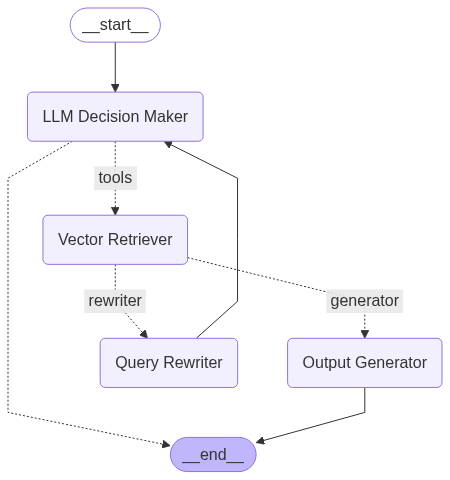

In [76]:
app

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM_DECISION_MAKE----
----CALLING GRADE FOR CHECKING RELEVANCY----
----DECISION: DOCS ARE RELEVANT----
----RAG OUTPUT GENERATE----
this is my response:content="LLM Powered Autonomous Agents involves building agents with LLM as the core controller. Prompt Engineering refers to methods for steering LLM's behavior without updating model weights. It is a powerful concept that requires heavy experimentation to achieve desired outcomes." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 327, 'total_tokens': 373, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BwISFnyalxFdXqinLnjm79lWoVFVG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--35c3b2cc-237d-4c7b-

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='a5fea10d-1f57-476c-a5ff-3a4a30392b4e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yM6N2UZavDtCTMU3RGPYpDwj', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_1y9CtXaEdpn12DoFc0lHTY5e', 'function': {'arguments': '{"query": "planning and reflection in terms of agents and langchain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_2cGDl8qgA7yeiWmRe7EcWQkH', 'function': {'arguments': '{"query": "prompt engineering in terms of agents and langchain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 163, 'total_tokens': 251, 'complet

In [ ]:
app.invoke({"messages":["hi how are you gpt?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='hi how are you gpt?', additional_kwargs={}, response_metadata={}, id='5423aa16-46e2-4501-8a61-7fd83583dd92'),
  AIMessage(content="Hello! I'm here and ready to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 145, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bvc75vZ1JPtD3EGPSems5GMlyUFWi', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9e637793-56b8-4b4d-b21d-ec20a866b7a0-0', usage_metadata={'input_tokens': 145, 'output_tokens': 19, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}

In [ ]:
app.invoke({"messages":["what is a capital of india?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='99fc90d7-35c8-4753-9450-c098e3eecdac'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 145, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bvc79nWetGOW2xh0MYoA8qtt2YUOD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7acc2c22-f456-406b-b8b7-6b74a2c228d1-0', usage_metadata={'input_tokens': 145, 'output_tokens': 9, 'total_tokens': 154, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [ ]:
question="can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?"

In [ ]:
app.invoke({"messages":[question]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?', additional_kwargs={}, response_metadata={}, id='b4276805-a6f9-40a0-b48d-670427f14be9'),
  AIMessage(content='Task decomposition is a method used in machine learning and natural language processing to break down complex tasks into smaller, more manageable sub-tasks. By decomposing a task, models can focus on solving each sub-task separately, which can lead to improved performance and efficiency.\n\nChain of Thought (CoT) is a prompting technique introduced by Wei et al. in 2022. CoT has become a standard prompting technique for enhancing model performance on complex tasks because it leverages task decomposition effectively. CoT works by chaining together multiple prompts, each focusing on a specific aspect or sub-task of the main task. This approach allows the mode

what is a main aim of this agentic rag?
answer: to provide more security and more validation and more determenstic flow to the RAG

# Assignment

## As a homework now try it out this one: Corrective RAG(Type of the Agentic RAG)

in this architecutre you are correcting the infomation from any other data source if retriever is not able to generate a correct output(in this architecture the external data source is web search)

1. take multiple data sources and complex data sources
2. strict your prompting in every node based on your desired output
3. check question and generated docuemnt(k=keep more than 5 with strict prompting according to your usecase)

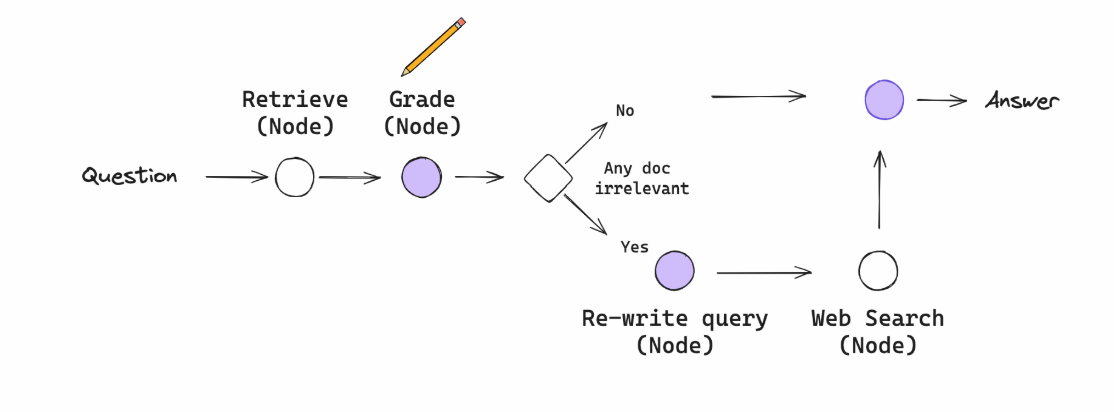